# Simple Linear Regression

RKM Example  
Sujoy Kumar Biswas  
Feb 12th, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import house_sales_data as hsd

In [5]:
# load data
data = hsd.house_sales_data()
price = data["price"]
beds = data["beds"]
area = data["area"]

Text(0, 0.5, 'Price (y)')

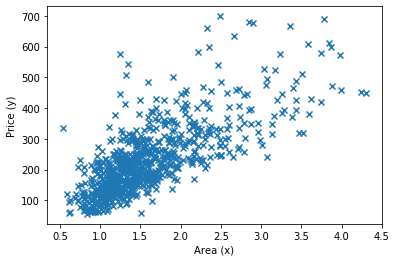

In [7]:
# plot data
df_house_data = pd.DataFrame({"Area":area, "Price":price}, columns=["Area", "Price"])
plt.scatter(df_house_data["Area"], df_house_data["Price"], marker='x')
plt.xlabel("Area (x)")
plt.ylabel("Price (y)")
# what hypothesis would you choose

In [10]:
# Rough guess at the best fitting straight line 
m = (500 - 100)/(3.5 - 1.0)
c = 500 - m*3.5

Text(0, 0.5, 'Price (y)')

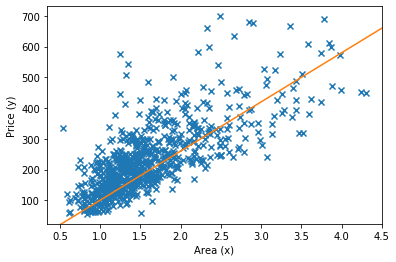

In [13]:
# Verification
theta = np.array([m, c])
plt.scatter(df_house_data["Area"], df_house_data["Price"], marker='x')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Area (x)")
plt.ylabel("Price (y)")


Text(0, 0.5, 'Price (y)')

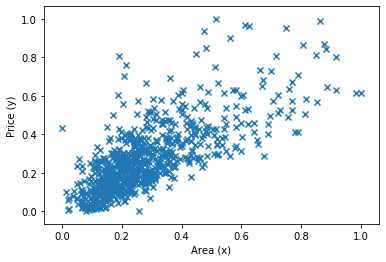

In [16]:
# data normalization
x = df_house_data["Area"].values
y = df_house_data["Price"].values
x_nor = (x - min(x)) / (max(x) - min(x))
y_nor = (y - min(y)) / (max(y) - min(y))
plt.scatter(x_nor, y_nor, marker = 'x')
plt.xlabel("Area (x)")
plt.ylabel("Price (y)")

In [15]:
# Visualizing gradient descent
theta = np.array([0., 0.])
alpha = 1.0
for t in range(101):
    if t % 10 == 0:
        print("Iteration {:3d}: ".format(t), theta)
    theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
    theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    

Iteration   0:  [0. 0.]
Iteration  10:  [0.39248673 0.11057268]
Iteration  20:  [0.5757467  0.09965796]
Iteration  30:  [0.66813304 0.08164034]
Iteration  40:  [0.71607193 0.06997155]
Iteration  50:  [0.7412001  0.06343746]
Iteration  60:  [0.75441709 0.05992619]
Iteration  70:  [0.76137712 0.05806394]
Iteration  80:  [0.7650437  0.05708055]
Iteration  90:  [0.76697552 0.05656201]
Iteration 100:  [0.76799339 0.05628873]


In [17]:
def gradient_descent(iters):
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return theta

def plot_fit(theta):
    plt.scatter(x_nor, y_nor, marker = 'x')
    plt.xlabel("Nomalized Area")
    plt.ylabel("Normalized Price")
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)
    

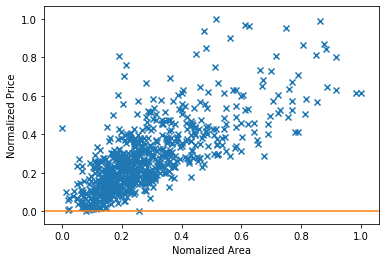

In [18]:
plot_fit(gradient_descent(0))

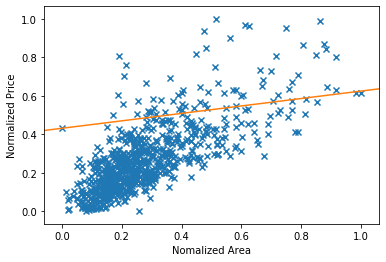

In [19]:
plot_fit(gradient_descent(1))

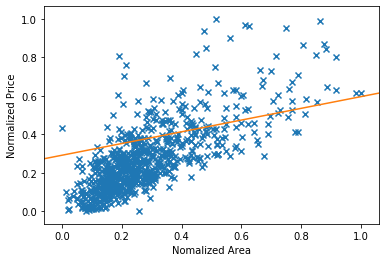

In [20]:
plot_fit(gradient_descent(5))

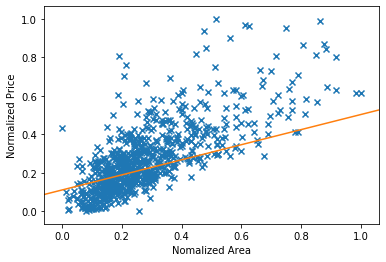

In [21]:
plot_fit(gradient_descent(10))

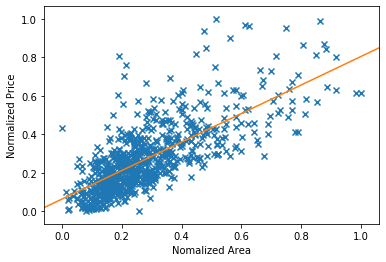

In [22]:
plot_fit(gradient_descent(50))

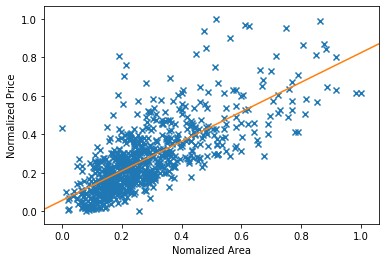

In [23]:
plot_fit(gradient_descent(100))

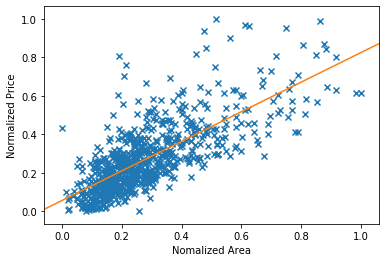

In [24]:
plot_fit(gradient_descent(150))

Text(0, 0.5, 'Average error')

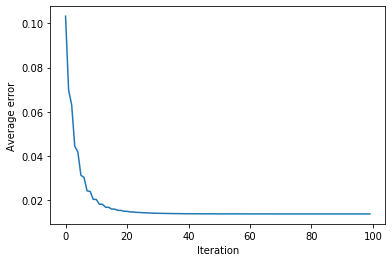

In [26]:
# Plotting residuals
def gradient_descent_err(iters):
    err = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        err.append(np.mean((theta[0] * x_nor + theta[1] - y_nor)**2))
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return np.array(err)


plt.plot(np.arange(0,100), gradient_descent_err(100))
plt.xlabel("Iteration")
plt.ylabel("Average error")

Text(0, 0.5, 'Average error minus optimal')

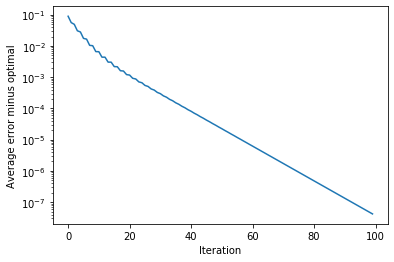

In [27]:
err = gradient_descent_err(1000)
plt.semilogy(err[:100] - err[-1])
plt.xlabel("Iteration")
plt.ylabel("Average error minus optimal")

In [28]:
# Visualizing parameter updates
def gradient_descent_params(iters):
    thetas = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        thetas.append(theta.copy())
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor)*x_nor)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) )
    return np.array(thetas)

def err(theta):
    return np.mean((np.outer(x_nor, theta[:,0]) + theta[:,1] - y_nor[:,None])**2,axis=0)

Text(0, 0.5, 'theta2')

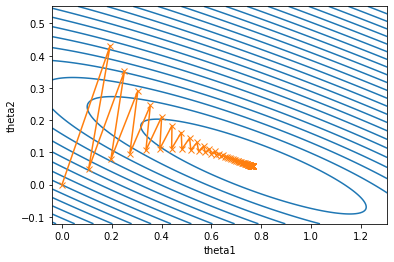

In [29]:
thetas = gradient_descent_params(100)
plt.plot(thetas[:,0], thetas[:,1])
xlim, ylim =(np.array(plt.gca().get_xlim()), np.array(plt.gca().get_ylim()))
xlim += np.array([0,0.5])
ylim += np.array([-0.1, 0.1])

XX,YY = np.meshgrid(np.linspace(xlim[0],xlim[1],200), np.linspace(ylim[0], ylim[1],200))
ZZ = err(np.hstack([np.ravel(XX)[:,None], np.ravel(YY)[:,None]])).reshape(XX.shape)
#V = np.logspace(np.log(np.min(ZZ)), np.log(np.max(ZZ)), 30)
V = np.linspace(np.sqrt(np.min(ZZ)), np.sqrt(np.max(ZZ)), 25)**2
plt.clf()
plt.contour(XX,YY,ZZ, V, colors=('C0',))
plt.plot(thetas[:,0], thetas[:,1], 'C1-x')
plt.xlabel("theta1")
plt.ylabel("theta2")

In [30]:
def gradient_descent_unnor(iters, alpha=1.0):
    theta = np.array([0., 0.])
    for t in range(iters):
        if t % (iters//10) == 0:
            print("Iteration {:3d}: ".format(t), theta)
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return theta


In [31]:
# blowing up
gradient_descent_unnor(100, alpha=1.0);

Iteration   0:  [0. 0.]
Iteration  10:  [ 1134474.27763654 -1706838.40792166]
Iteration  20:  [-4.90307831e+09  8.86351858e+09]
Iteration  30:  [ 1.73439437e+13 -3.36914273e+13]
Iteration  40:  [-5.52949548e+16  1.11908477e+17]
Iteration  50:  [ 1.64642345e+20 -3.42801235e+20]
Iteration  60:  [-4.65382362e+23  9.90878361e+23]
Iteration  70:  [ 1.25870873e+27 -2.73271987e+27]
Iteration  80:  [-3.26783802e+30  7.22720329e+30]
Iteration  90:  [ 8.14048852e+33 -1.83509268e+34]


In [32]:
gradient_descent_unnor(100, alpha=0.0001);

Iteration   0:  [0. 0.]
Iteration  10:  [0.82799305 0.45568461]
Iteration  20:  [1.64974376 0.90785018]
Iteration  30:  [2.46529944 1.35652342]
Iteration  40:  [3.27470707 1.8017308 ]
Iteration  50:  [4.07801326 2.24349863]
Iteration  60:  [4.87526427 2.68185301]
Iteration  70:  [5.66650599 3.11681982]
Iteration  80:  [6.451784   3.54842478]
Iteration  90:  [7.23114349 3.97669337]


In [33]:
gradient_descent_unnor(10000, alpha=0.0001);

Iteration   0:  [0. 0.]
Iteration 1000:  [58.32766959 31.77532421]
Iteration 2000:  [85.82157865 46.18031036]
Iteration 3000:  [98.90692639 52.48032744]
Iteration 4000:  [105.25651482  55.00330686]
Iteration 5000:  [108.45464214  55.77076223]
Iteration 6000:  [110.17574424  55.7268157 ]
Iteration 7000:  [111.2021021   55.31231222]
Iteration 8000:  [111.8992428   54.73300503]
Iteration 9000:  [112.43801331  54.08483288]


In [34]:
# getting answer back in original coordinate
theta = gradient_descent(100)
a, b, c, d = min(y), max(y) - min(y), min(x), max(x) - min(x)
theta_hat = np.array([b * theta[0] / d, b*theta[1] + a - c*b*theta[0]/d])

Text(0, 0.5, 'Peak Demand (GW)')

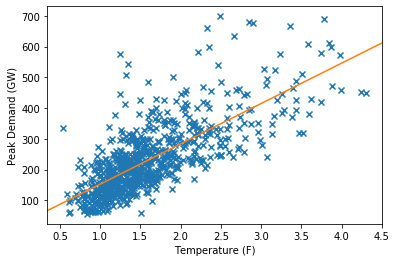

In [31]:
plt.scatter(df_summer["Temp"], df_summer["Load"], marker='x')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.plot(xlim, [theta_hat[0]*xlim[0]+theta_hat[1], theta_hat[0]*xlim[1]+theta_hat[1]], 'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Temperature (F)")
plt.ylabel("Peak Demand (GW)")

# Multiple Linear Regression and Least square

We can use the simple linear hypothesis with $\theta \in \mathbb{R}^n$ and 
\begin{equation}
h_\theta(x) = \sum_{j=1}^n \theta_j x_j = \theta^T x.
\end{equation}
Because the final feature is always one, the final coefficient $\theta_n$ always serves as a bias term without the need for special handling.  This ultimately makes for a cleaner formulation of most algorithms, so we will generally adopt this notation throughout.

Now let's define the key ingredients of the least square problem.  Note that these are exactly the same as we had in our previous example, except that we now have a more generic form of hypothesis function.

1. Linear hypothesis function $h_\theta(x) = \sum_{j=1}^n \theta_j x_j$.
2. Squared error loss: $\ell(h_\theta(x), y) = (h_\theta(x) - y)^2$

These specify the first two elements of a machine learning algorithm, but how do we solve the resulting machine learning optimization problem
\begin{equation}
\minimize_\theta \;\; \frac{1}{m} \sum_{i=1}^m \left (\sum_{j=1}^n \theta_j x^{(i)}_j - y^{(i)} \right )^2
\end{equation}
where we will again use $E(\theta)$ as shorthand for this objective.

In this section, we'll explore two ways to do so, by gradient descent, generalizing the procedure we described earlier, and by exact solution.

### Gradient descent for least squares

Recall that the gradient descent algorithm takes a small step in the direction of the negative partial derivative for each coordinate of the parameters $\theta_j$.  So to being, let's take the partial derivative of the objective with respect to $\theta_j$.  Again, the only properties were are going to use here are the chain rule, linearity of derivatives, and simple rules for differentiating polynomials.  Note also that because we are differentiating with respect to $\theta_j$, we'll use the index $k$ to sum over the different coordinates in the hypothesis function, or else there would be a collision with too many $j$ variables.
\begin{equation}
\begin{split}
\frac{\partial E(\theta)}{\partial \theta_j} 
& = \frac{\partial}{\partial \theta_j} \frac{1}{m}\sum_{i=1}^m \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right )^2 \\
& = \frac{1}{m} \sum_{i=1}^m  \frac{\partial}{\partial \theta_j} \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right )^2 \\
& = \frac{1}{m} \sum_{i=1}^m 2 \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) \frac{\partial}{\partial \theta_j} \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) \\
& = \frac{2}{m} \sum_{i=1}^m \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) x^{(i)}_j \\
\end{split}
\end{equation}
where the key observation in moving from like 3 to 4 is that when we differentiate $\sum_{k=1}^n \theta_k x^{(i)}_k$ with repsect to $\theta_j$, this term will only be a non-constant relative to $\theta_j$ with $j=k$, in which case the derivative is just the $x^{(i)}_j$ term.

Thus, gradient descent for the least squares algorithm takes the following form

<hr/>

**Initialize:**
    
* $\theta := 0$ 

**Repeat until converged:**

* **For $j = 1,\ldots,n$:**

    * $\displaystyle \theta_j := \theta_j + \alpha\frac{2}{m} \sum_{i=1}^m \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) x^{(i)}_j$

<hr/>

In [47]:
def gradient_descent_ls(X, y, iters, alpha=1.0):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs

In [48]:
def normalize_data(X, y, normalize_cols):
    """ Normalize y and specified columns of X in place. """
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y

X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

Now let's run gradient descent to find our parameters, and convert them back into units in the original problem.  Note that in general, the method for unnormalizing the parameters is a simple extension of what we described before.  Specifically, if
\begin{equation}
\frac{y-\min(y)}{\mathrm{range}(y)} = \sum_{j=1}^{n-1} \theta_j \frac{x_j - \min(x_j)}{\mathrm{range}(x_j)} + \theta_n
\end{equation}
then 
\begin{equation}
y = \sum_{j=1}^{n-1}\hat{\theta}_j x_j + \hat{\theta}_n
\end{equation}
where 
\begin{equation}
\hat{\theta}_j = \theta_j \frac{\mathrm{range}(y)}{\mathrm{range}(x_j)}, \;\; \hat{\theta}_n = \theta_n \mathrm{range}(y) + \min(y) - \sum_{j=1}^{n-1} \hat{\theta}_j \min(x_j).
\end{equation}

In [49]:
def unnormalize_theta(theta, normalize_cols, ranges):
    theta[normalize_cols] /= (ranges[1] - ranges[0])
    theta *= ranges[3] - ranges[2]
    theta[-1] += ranges[2] - theta[normalize_cols] @ ranges[0]

theta, errs = gradient_descent_ls(X, y, 500, alpha=0.5)
unnormalize_theta(theta, [True, True, False], ranges)
print(theta)

[ 0.22869078 -0.02735142 -0.00409664]


(-0.06517660044150111, 1.065176600441501)

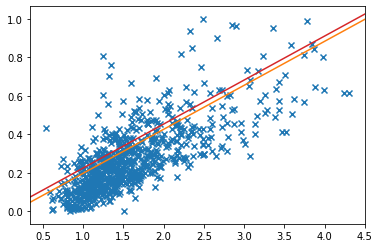

In [51]:
plt.scatter(area, price, marker='x', color='C0')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.plot(xlim, [theta[0]*xlim[0] + theta[1] + theta[2], theta[0]*xlim[1] + theta[1] + theta[2]], 'C1',
         xlim, [theta[0]*xlim[0] + theta[2], theta[0]*xlim[1] + theta[2]], 'C3')
plt.xlim(xlim)
plt.ylim(ylim)


# Analytic Solution

Gradient descent is appealing in its generality but certainly also has some annoyances (picking step sizes, number of iterations, ensuring proper data normalization, etc).  These issues will be unavoidable for many of the problems we encounter, but it turns out that for least squares in particular, there is an alternative that is much easier to compute in many cases.  Specifically, if we consider our previous picture on the derivative of a function
![Illustration of a function and it's derivative.](opt_grad.svg)
then we can see that the derivative doesn't just point is the direction of function increase, it also provides a method for checking whether the solution is optimal: namely, a point will be at a minimum precisely when the gradient is zero (in general, a zero derivative could mean either a minimum or a maximum, but it turns out for the types of functions such as the least squares objective, there is only a single global minimum that has zero derivatives).  In the case of multivariate functions, the condition is similar: a function (assuming some technical conditions, such that it is differentiable everywhere) will be at a minimum only if all the partial derivatives are zero.

To make the notation a bit more convenient, we introduce an additional term called the _gradient_ of a function.  For a function $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the gradient, denoted $\nabla f(\theta)$, is a vector of all partial derivatives
\begin{equation}
\nabla f(\theta) \in \mathbb{R}^n = \left [ \begin{array}{c} 
\displaystyle \frac{\partial f(\theta)}{\partial \theta_1} \\
\displaystyle \frac{\partial f(\theta)}{\partial \theta_2} \\ \displaystyle \vdots \\
\displaystyle \frac{\partial f(\theta)}{\partial \theta_n} \end{array} \right ].
\end{equation}
There are a few important things to note here.  First, the gradient as we defined it here is defined only for functions that take _vector_ inputs and output a _scalar_: we cannot take the gradient of a vector-valued function, or a matrix-input function.  Second, the gradient is itself always a _vector_ the same same as the input to the function.  If there are multiple arguments to the function $f$ e.g., $f(\theta,\eta)$, then we will indicate which element we take the gradient with respect to using the notation $\nabla_\theta f(\theta,\eta)$, but we can omit this subscript in the case that there is only one specified argument to the function.

Restating what we said above with this notation, the condition that $f(\theta)$ be at a minimum holds only if $\nabla f(\theta) = 0$.  What is interesting about the least squares case is that we can actually find such a point analytically using matrix operations.

First, let's write the gradient of the least squares objective more succinctly.  Recall from before that we had
\begin{equation}
\frac{\partial E(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) x^{(i)}_j
\end{equation}
Since the only term here that depends on $j$ is the final $x^{(i)}_j$, this immediately leads to the fact that
\begin{equation}
\nabla E(\theta) = \frac{2}{m} \sum_{i=1}^m x^{(i)} \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ).
\end{equation}

Let's use the fact that $\sum_{k=1}^n \theta_k x_k \equiv \theta^T x = x^T \theta$ to write this a bit more succintly as
\begin{equation}
\begin{split}
\nabla E(\theta) & = \frac{2}{m} \sum_{i=1}^m x^{(i)} \left ({x^{(i)}}^T \theta - y^{(i)} \right ) \\
& = \frac{2}{m} \sum_{i=1}^m x^{(i)} {x^{(i)}}^T \theta -  \frac{2}{m} \sum_{i=1}^m x^{(i)} y^{(i)} \\
& = \frac{2}{m} \left(\sum_{i=1}^m x^{(i)} {x^{(i)}}^T \right) \theta -  \frac{2}{m} \sum_{i=1}^m x^{(i)} y^{(i)}
\end{split}
\end{equation}
where in both lines we used the distributive property of matrix multiplication and in the last line, the fact that $\theta$ does not depend on $i$. Now, we can find the $\theta^\star$ that makes this entire term zero just with some linear algebra.
\begin{equation}
\begin{split}
\nabla E(\theta^\star) = 0 & \Longleftrightarrow 
 \frac{2}{m} \left(\sum_{i=1}^m x^{(i)} {x^{(i)}}^T \right) \theta^\star -  \frac{2}{m} \sum_{i=1}^m x^{(i)} y^{(i)} = 0 \\
 & \Longleftrightarrow \theta^\star = \left(\sum_{i=1}^m x^{(i)} {x^{(i)}}^T \right)^{-1} \left (\sum_{i=1}^m x^{(i)} y^{(i)} \right )
 \end{split}
\end{equation}
where note that the $\frac{2}{m}$ terms will cancel, leading to the final solution without any additional constant term.

If expressions like this seems hard to follow at first, a good strategy is to determine the size of each element of the expression.  For example, what size is the (matrix? vector?) $\sum_{i=1}^m x^{(i)} {x^{(i)}}^T$?  What size is the (matrix? vector?) $\sum_{i=1}^m x^{(i)} y^{(i)}$?  Going through these questions yourself, just using the definitions of matrix multiplication, will help make the algorithms that follow much more concrete.

In [52]:
def analytic_ls(X,y):
    m,n = X.shape
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(m):
        A += np.outer(X[i], X[i])
        b += X[i] * y[i]
    return np.linalg.solve(A, b)

In [54]:
X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
theta = analytic_ls(X,y)
print(theta)

[ 0.23109098 -0.0292946  -0.0015854 ]


We get the same answer as with gradient descent, but with no need for an iterative method or picking stepsize parameters. However, it turns out we can make the code even simpler by writing even more of the terms in linear algebra form.

### Matrix/vector notation: one more level

To make the least squares solutione even simpler (and remember, this _is_ about making the resulting method simpler ... even if it seems more complex due to the initial notation, the simplicity will hopefully come through in the final code that we write), we can introduce some additional matrix/vector notation.  First, let's define the matrix and vector
\begin{equation}
X \in \mathbb{R}^{m \times n} = \left [ \begin{array}{c} 
{x^{(1)}}^T \\
{x^{(2)}}^T \\
\vdots \\
{x^{(m)}}^T \end{array} \right ], \;\;
y \in \mathbb{R}^{m} = \left [ \begin{array}{c} 
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \end{array} \right ],
\end{equation}
i.e., $X$ is a matrix with the individual inputs as the _rows_ in the matrix, and $y$ is a vector of all the outputs. 
Note that these are actually exactly the matrix/vector we already formed for our data in the code above, so this is a fairly natural representation.

Let's now consider how to succintly represent the term 
\begin{equation}
\nabla E(\theta) = \frac{2}{m} \sum_{i=1}^m x^{(i)} \left ({x^{(i)}}^T \theta - y^{(i)} \right )
\end{equation}
using this notation.  First, note that the vector $X \theta - y$ (an $m$ dimenional vector), contains precisely ${x^{(i)}}^T \theta - y^{(i)}$ as its $i$th element.  So to create a new vector that multiplies $x^{(i)}$ by each element of this vector, we simply form the matrix-vector product
\begin{equation}
\nabla E(\theta) = \frac{2}{m} X^T (X \theta - y).
\end{equation}

This formula both provides a convenient way to compute the entire gradient (we could replace the notation code in the previous sections that computes the gradient with this expression, to avoid any for loops), and it provides a succint way to compute the analytic solution.
\begin{equation}
\nabla E(\theta^\star) = 0 \; \Longleftrightarrow \; \frac{2}{m} X^T (X \theta^\star - y) = 0 \; \Longleftrightarrow \theta^\star = (X^T X)^{-1} X^T y.
\end{equation}

Let's see what this looks like in code.

In [56]:
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(theta)

[ 0.23109098 -0.0292946  -0.0015854 ]


# Libraries for machine learning in Python

Finally, we conclude with some information about the types of libraries we will use to run machine learning algorithms in Python. Although there are a number of machine learning packages available, by far the most popular Python library for general-purpose "classical" machine learning (this is in contrast to packages focused specficially on deep learning, such as TensorFlow) is the scikit-learn library. Scikit Learn is general purpose machine learning library with a number of common machine learning algorithms built in.

One important note, however, is that (despite some ongoing efforts to make it more scalable), scikit-learn is still best suited for small to medium-scale problems (say with ~10,000s of examples and ~1,000s of features). For these size problems, most of the algorithms contained in the library will work reasonably fast, and the library has the advantage that one can train many different types of algorithms all with the same interface. However, if you have data that is much bigger than this, then the algorithms start to get fairly slow compared to other more specialized libraries, and you are likely better off using an alternative library.

## Linear regression in scikit-learn

Let's look at how we specify a model, fit it to data, and make predictions in scikit-learn.  These three tasks form the common usage pattern for most interation with scikit-learn.  Let's first prepare our data.  Note that scikit-learn by default will fit a separate intercept term for linear regression models, so we don't include the all-ones entry in our features.

In [73]:
# create old X that has the intercept terms
X = np.array([area, beds]).T
y = price

In [ ]:
# import the model and fit it to data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=False)


In [75]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# predict on new data
Xnew = X[-2:-1,:]
print(model.predict(Xnew))

[0.27062452]


In [77]:
print(model.coef_, model.intercept_)

[ 0.23109098 -0.0292946 ] -0.0015853966357703975


## Scikit-learn vs. pure Python¶

For an algorithm as simple as least-squares, I highly recommend that you just implement the algorithm youself. It is literally one line of code to train the model, and you end up with a much better understanding of what is going on.


In [78]:
# create old X that has the intercept terms
X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(theta)

[ 0.23109098 -0.0292946  -0.0015854 ]


Making predictions is also just one line of code, forming $X \theta$.

In [79]:
Xnew = X[-2:-1,:]
print(Xnew @ theta)

[0.27062452]


With something so simple, it has always struck me as complete overkill to import an entire library like scikit-learn, especially since you now have to remember things like whether or not to specify the bias term, etc. You'll have much more control over the algorithm if you just implement it manually. However, the real advantage of scikit-learn, as mentioned, is that you can very quickly try out a large number of algorithms, so if you do throw least squares in there amongst many others, it is not the worst thing in the world. Just be aware that nothing magical is happening in the background here, just some very simple linear algebra.